### LANGUAGE'S GRAPH

In [1]:
import networkx as nx
from lang2vec.lang2vec import get_features
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [5]:
def language_graph(langs, feature_set="geo+syntax_wals|syntax_sswl",threshold=0.75, show=True):  
    """ 
    create a graph between languages using cosine similarity.
    """
    features = get_features(langs, feature_set, header=False, minimal=True ) # get features for all languages
    langs_vec = []
    for lang in langs:
        vec = []
        for v in features[lang]:
            if v != '--':
                vec.append(float(v))
            else:
                vec.append(0.0)
        langs_vec.append(vec)
    langs_vec = np.array(langs_vec, dtype=np.float32) 
    # build a matrix with lang_vectors, substituting '--'(not found) with 0.0
    M = cosine_similarity(langs_vec) # cosine similarity matrix
    sim_df = pd.DataFrame(M, index=langs, columns=langs).round(2)

    G = nx.Graph()
    for lang in langs:
        G.add_node(lang, x = features[lang])  # add node and attribute
    
    for i in range(len(langs)):
        for j in range(i+1, len(langs)):
            if M[i,j] > threshold:
                G.add_edge(langs[i], langs[j], weight=M[i,j]) # add edge with weight (cosine similarity)
                
    if show:    #plot the graph
        pos = nx.spring_layout(G, seed=0, k=3.0)
        edge_weights = []
        for u, v in G.edges():
            weight = G[u][v]['weight']
            edge_weights.append(weight * 1.5)
        nx.draw(G, pos, with_labels=True, node_color='green', font_size=10, node_size = 1000 ,width=edge_weights, alpha=0.7)
        nx.draw_networkx_edge_labels(G, pos, edge_labels={tupla: round(w, 2) for tupla, w in nx.get_edge_attributes(G, 'weight').items()}, font_size=7, font_color='grey')
        plt.title(f"Language Similarity Graph  (cosine > {threshold})")
        plt.figure(figsize=(20, 20))
        plt.show()
        
    return G, sim_df

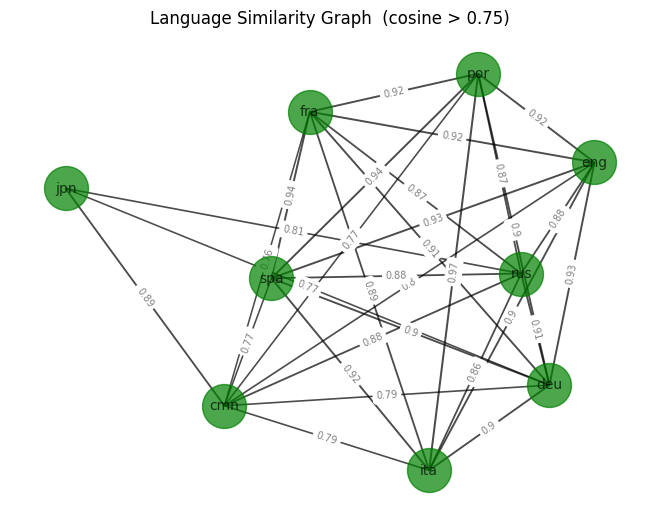

<Figure size 2000x2000 with 0 Axes>

In [6]:
langs = ["eng", "ita", "spa", "fra", "deu", "rus", "por", "cmn", "jpn"]
G, sim_df = language_graph(langs, threshold=0.75, show=True)


In [7]:
sim_df  # show the similarity matrix

,eng,ita,spa,fra,deu,rus,por,cmn,jpn
eng,1.00,0.90,0.93,0.92,0.93,0.88,0.92,0.80,0.74
ita,0.90,1.00,0.92,0.89,0.90,0.86,0.97,0.79,0.70
spa,0.93,0.92,1.00,0.94,0.90,0.88,0.94,0.77,0.67
fra,0.92,0.89,0.94,1.00,0.91,0.87,0.92,0.76,0.71
deu,0.93,0.90,0.90,0.91,1.00,0.91,0.90,0.79,0.77
rus,0.88,0.86,0.88,0.87,0.91,1.00,0.87,0.88,0.81
por,0.92,0.97,0.94,0.92,0.90,0.87,1.00,0.77,0.68
cmn,0.80,0.79,0.77,0.76,0.79,0.88,0.77,1.00,0.89
jpn,0.74,0.70,0.67,0.71,0.77,0.81,0.68,0.89,1.00
